In [4]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df =pd.read_csv("D:/CDAC/Advance Statistics/Day1/pandas/MS_Dhoni_ODI_record.csv")

In [6]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236


In [7]:
df['opposition'] = df['opposition'].apply(lambda x: x[1:])

In [8]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005,ODI # 2236
...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,27/06/2019,ODI # 4175
346,42*,42,31,135.48,4,1,England,Birmingham,30/06/2019,ODI # 4179
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,02/07/2019,ODI # 4182
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,06/07/2019,ODI # 4187


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   score        350 non-null    object
 1   runs_scored  350 non-null    object
 2   balls_faced  350 non-null    object
 3   strike_rate  350 non-null    object
 4   fours        350 non-null    object
 5   sixes        350 non-null    object
 6   opposition   350 non-null    object
 7   ground       350 non-null    object
 8   date         350 non-null    object
 9   odi_number   350 non-null    object
dtypes: object(10)
memory usage: 27.5+ KB


In [10]:
df['date']=pd.to_datetime(df['date'],dayfirst=True)
df['year']=df['date'].dt.year.astype(int)

In [11]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005


In [12]:
df['score']=df['score'].apply(str)

df['not_out']=np.where(df['score'].str.endswith('*'),1,0)

In [13]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005,0
...,...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,ODI # 4175,2019,1
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,ODI # 4179,2019,1
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,ODI # 4182,2019,0
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,ODI # 4187,2019,0


In [14]:
df['not_out'].value_counts()

0    266
1     84
Name: not_out, dtype: int64

In [15]:
df.drop("odi_number",axis=1,inplace=True)

In [16]:
df_new = df.loc[((df['score'] != 'DNB') & (df['score'] != 'TDNB')),'runs_scored':]

In [17]:
df_new.head()

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0


In [18]:
df_new['runs_scored']=df_new['runs_scored'].astype(int)
df_new['balls_faced']=df_new['balls_faced'].astype(int)
df_new['strike_rate']=df_new['strike_rate'].astype(float)
df_new['sixes']=df_new['sixes'].astype(int)
df_new['fours']=df_new['fours'].astype(int)


In [19]:
#career stats

first_match_date = df['date'].dt.date.min().strftime('%B %d,%Y')
print("First Match Date : ",first_match_date)

First Match Date :  December 23,2004


In [20]:
last_match_date = df['date'].dt.date.max().strftime('%B %d,%Y')
print("Last Match Date : ",last_match_date)

Last Match Date :  July 09,2019


In [21]:
number_of_matches =df.shape[0]
print("Number of matches",number_of_matches)

Number of matches 350


In [22]:
number_of_innings =df_new.shape[0]
print("Number of innings played",number_of_innings)

Number of innings played 297


In [23]:
not_out=df_new['not_out'].sum()
print("Not outs",not_out)

Not outs 84


In [24]:
df_new.head()

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0.00,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350.00,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0


In [25]:
total_runs = df_new['runs_scored'].sum()
print("Total runs scored in career",total_runs)

Total runs scored in career 10773


In [26]:
career_avg = (total_runs)/(number_of_innings -not_out)
print("Career average is : ",career_avg)

Career average is :  50.57746478873239


In [27]:
highest_score_in_inning = df_new['runs_scored'].max()
print("Highest score ",highest_score_in_inning)

Highest score  183


In [28]:
lowest_score = df_new['runs_scored'].min()
print("Lowest score ",lowest_score)

Lowest score  0


In [29]:
balls_faced =df_new['balls_faced'].sum()

print("total balls faced ",balls_faced)

total balls faced  12303


In [30]:
career_st =(total_runs/balls_faced)*100
print("career strike rate ",career_st)

career strike rate  87.56400877834675


In [31]:
# no. of 100s and 50s 

hundreds =df_new.loc[df_new['runs_scored']>=100].shape[0]

print("no. of hundreds ",hundreds)


fifties =df_new.loc[df_new['runs_scored']>=50].shape[0]

print("no. of fifties ",fifties)

no. of hundreds  10
no. of fifties  83


In [32]:
#other solution
hundreds = np.count_nonzero(df_new['runs_scored'] >= 100)
fifties = np.count_nonzero(df_new['runs_scored'] >= 50)
print(hundreds)
fifties

10


83

               runs_scored
opposition                
 Afghanistan            36
 Africa XI             174
 Australia            1660
 Bangladesh            569
 Bermuda                29
 England              1546
 Hong Kong             109
 Ireland                34
 Netherlands            19
 New Zealand           940
 Pakistan             1231
 South Africa          830
 Sri Lanka            2383
 West Indies          1005
 Zimbabwe              208


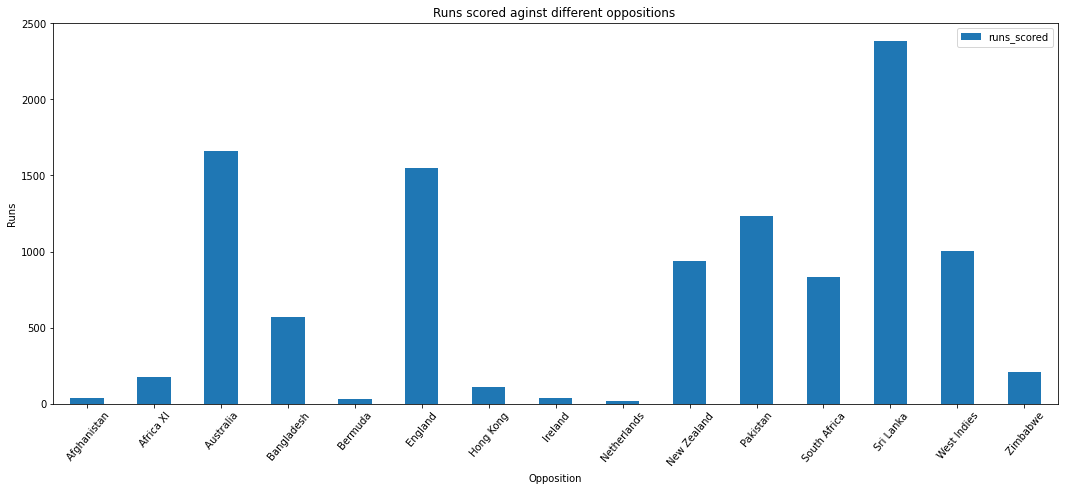

In [33]:
#runs scored against each team

runs_scored_by_opposition =pd.DataFrame(df_new.groupby('opposition')['runs_scored'].sum())
print(runs_scored_by_opposition)

runs_scored_by_opposition.plot(kind='bar',title='Runs scored aginst different oppositions ',figsize=(18,7))
plt.xlabel("Opposition")
plt.ylabel("Runs")
plt.xticks(rotation=50)
plt.legend()
plt.show()

               runs_scored
opposition                
 Netherlands            19
 Bermuda                29
 Ireland                34
 Afghanistan            36
 Hong Kong             109
 Africa XI             174
 Zimbabwe              208
 Bangladesh            569
 South Africa          830
 New Zealand           940
 West Indies          1005
 Pakistan             1231
 England              1546
 Australia            1660
 Sri Lanka            2383


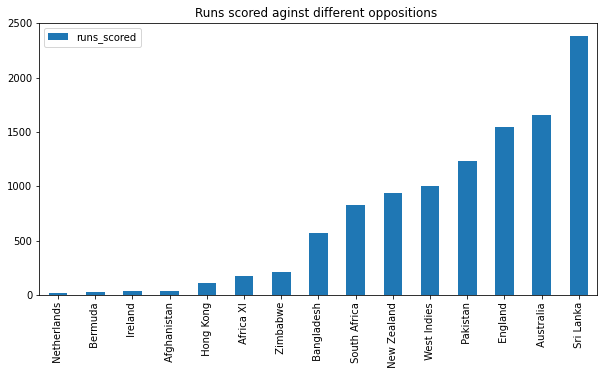

In [40]:
sorted = runs_scored_by_opposition.sort_values(by='runs_scored',ascending=True)
print(sorted)
sorted.plot(kind='bar',title='Runs scored aginst different oppositions ',figsize=(10,5))
plt.xlabel(None)
plt.show()

      runs_scored
year             
2004           19
2005          895
2006          821
2007         1103
2008         1097
2009         1198
2010          600
2011          764
2012          524
2013          753
2014          418
2015          640
2016          278
2017          788
2018          275
2019          600


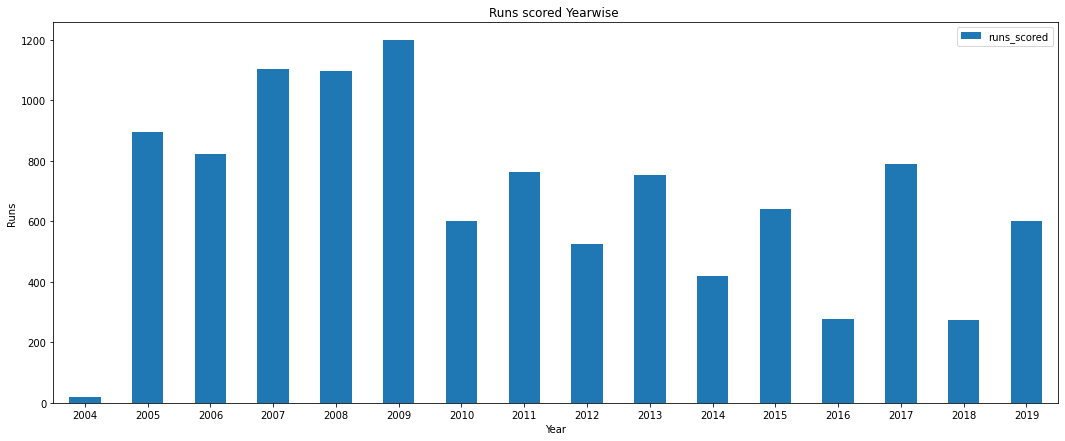

In [35]:
#runs scored year wise

runs_scored_by_yearwise =pd.DataFrame(df_new.groupby('year')['runs_scored'].sum())
print(runs_scored_by_yearwise)

runs_scored_by_yearwise.plot(kind='bar',title='Runs scored Yearwise ',figsize=(18,7))
plt.xlabel("Year")
plt.ylabel("Runs")
plt.xticks(rotation=0)
plt.legend()
plt.show()

In [36]:
# sorted = runs_scored_by_yearwise.sort_values(by='runs_scored',ascending=True)
# print(sorted)
# sorted.plot(kind='bar',title='Runs scored yearwise ',figsize=(18,7))
# plt.xlabel(None)
# plt.show()


# in ascending order

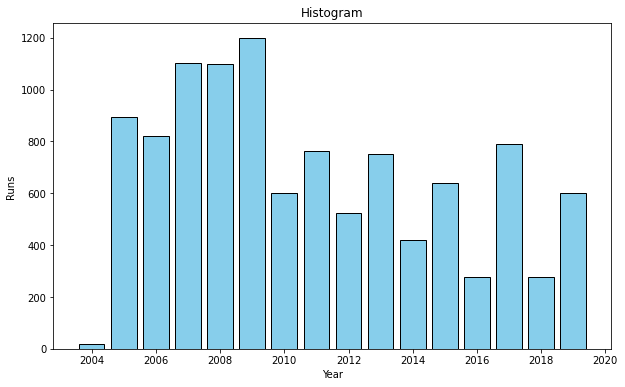

In [37]:
#as a bar plot 
df_grouped=df_new.groupby('year')['runs_scored'].sum().reset_index()


plt.figure(figsize=(10,6))
plt.bar(df_grouped['year'],df_grouped['runs_scored'],color='skyblue',edgecolor='black')
plt.title("Histogram")
plt.xlabel("Year")
plt.ylabel("Runs ")
plt.show()

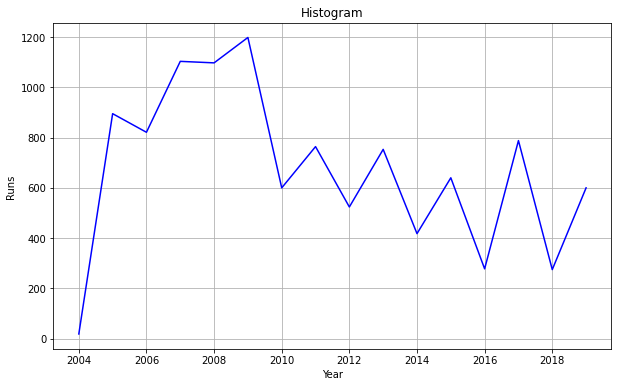

In [38]:
#as a line plot

plt.figure(figsize=(10,6))
plt.plot(df_grouped['year'],df_grouped['runs_scored'],linestyle='-',color='blue')
plt.title("Histogram")
plt.xlabel("Year")
plt.ylabel("Runs ")
plt.grid(True)
plt.show()

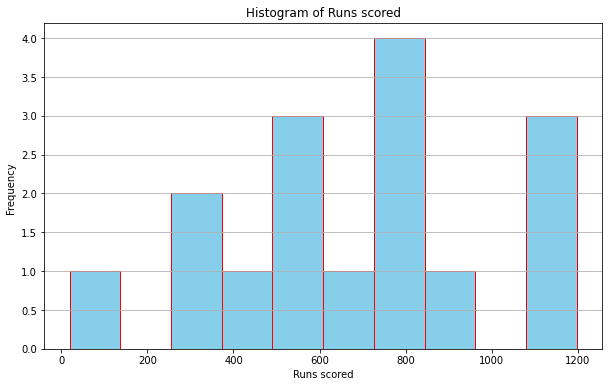

In [39]:
#as a histogram to show a frequency - not year by year performance
plt.figure(figsize=(10,6))
plt.hist(df_grouped['runs_scored'],bins=10,color='skyblue',edgecolor='r')
plt.title("Histogram of Runs scored")
plt.xlabel("Runs scored")
plt.ylabel("Frequency  ")
plt.grid(axis='y')
plt.show()